# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.stats as stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


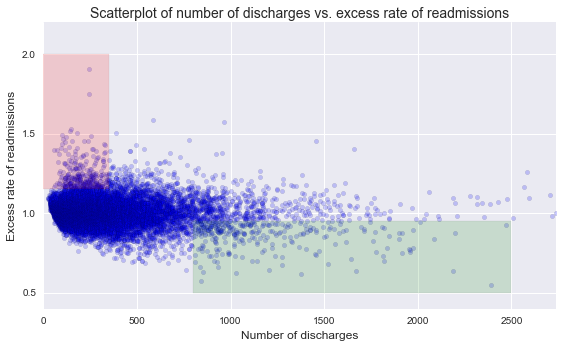

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [5]:
# Your turn

****

## Modified Report

***MY COMMENTS ON THE REPORT ARE IN ITALIC BOLD FONT LIKE THIS STATEMENT***

*A. Initial observations based on the plot above*
+ Overall, rate of readmissions is trending down with increasing number of discharges ***How is this determined???***
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red) 
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)  

***There are many more data points on lower discharge hospitals vs higher meaning without explaining an actual reason for the outliers the use of the red box and the green box are misleading. The claim is being based on the correlation between these two factors and no such correlation was measured nor tested for significance.***  
***I have added a general line of fit to observe the trendline for these two factors. We can see the slope is negative but 

***
*B. Statistics*
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1  

***These statistics are computed correctly but used to justify an improper conclusion.***
***
*C. Conclusions*
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

***How is a significant correlation determined??? Where is the analysis? The scatter plot is not an analysis; it is a visualization.***  
***I partially agree with the second point however I would state it in this way... "Hospitals/facilities with a readmission rate above the 95th percentile may be lacking necessary resources to ensure quality care and prevent complications that lead to readmission." The 95th percentile threshold indicate readmission outliers.***

***
*D. Regulatory policy recommendations*
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.  

***No. Hospitals/facilities with an outlying rate or borderline hospitals with positively trending rate that will imminently lead to becoming an outlier should have their programs evaluated for differences is key readmission areas against hospitals with stellar records for low readmission rates for those treatment types. Incentives should be provided to the hospitals that qualify to be 'best in class' and directives should push for the sharing of best practices including advocating for more standardized training.***

## Add a line of best fit to the original plot
#### Investigating the claims made in the *A* section of the report.

In [6]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

slope, intercept = np.polyfit(x,y,1)
new_y = np.array(x) * slope + intercept
new_y = new_y.tolist()

print(len(x))
print(len(new_y))

11494
11494


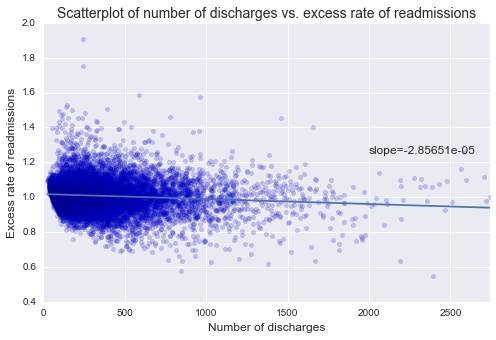

In [16]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

# Added line
ax.plot(x,new_y)
ax.text(2000,1.25,'slope={}'.format(round(slope,10)))

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)


## Hypothesis Testing
$H_0:$ There is no correlation between Number of Discharges and the Excess Readmission Ratio.  
$H_A:$ There **is** a correlation between Number of Discharges and the Excess Readmission Ratio.

In [9]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]


In [10]:
# Using Pearson correlation for hypothesis testing
# Compute observed correlation: r_obs
r_obs = pearson_r(x, y)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    x_permuted = np.random.permutation(x)
    y_permuted = np.random.permutation(y)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(x_permuted, y_permuted)

# Compute p-value: p
p = np.sum(perm_replicates <= r_obs)/len(perm_replicates)
print('p-val =', p)

('p-val =', 0)


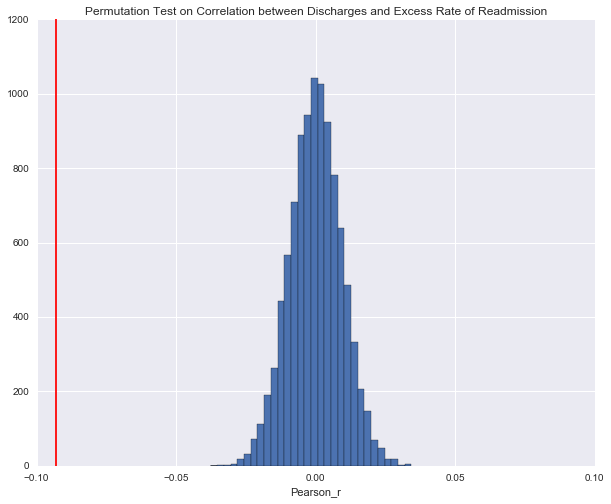

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
plt.hist(perm_replicates, bins=30)
plt.xlim(-0.1,0.1)
plt.vlines(r_obs,0,1200,colors='red')
plt.title('Permutation Test on Correlation between Discharges and Excess Rate of Readmission')
plt.xlabel('Pearson_r')
plt.show()


The observed correlation score of -0.09 has shown to be statistically significant at the 0.01 alpha level. However, The correlation is barely anything impactful. There shows to be with this data that an extremely slight negative correlation exists between the Number of Discharges at a hospital and an Excess Rate of Readmissionsthat is statistically significant.